In [1]:
%pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.3 MB/s eta 0:00:00


In [3]:
from sklearn.neural_network import MLPClassifier

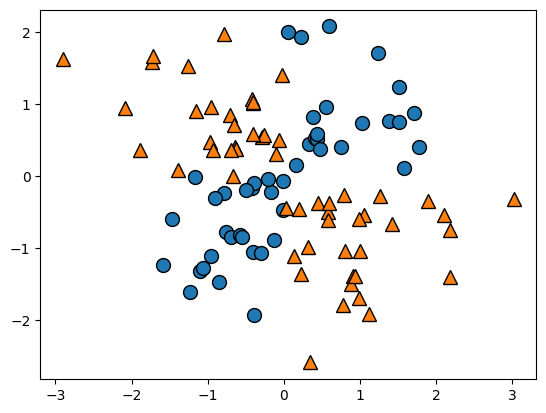

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import mglearn

#200개의 데이터, feature = 2개
np.random.seed(30)
X = np.random.randn(100, 2)
y = np.logical_xor(X[:, 0]>0, X[:, 1]>0)
y = np.where(y, 1, -1)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   shuffle=True)

직접 해보세요.  
1번째 은닉층 : 노드 10개  
2번째 은닉층 : 노드 5개  
3번째 은닉층 : 노드 3개

In [13]:
model_pctr = MLPClassifier(hidden_layer_sizes=([10, 5, 3]), max_iter=int(1e+05)) # 다층 퍼셉트론

In [14]:
model_pctr.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=[10, 5, 3], max_iter=100000)

In [17]:
model_pctr.score(X_train, y_train)

0.9875

In [16]:
model_pctr.score(X_test, y_test)

0.9

#### parameter
- activation  
1) default : relu  
2) logistic (sigmoid)  
3) tanh (sigmoid 일종)  
4) indentity : linear  

- solver
1) default : adam  
2) lbfgs  
3) sgd : stochastic(확률적) gradient decent  

- alpha : l2 norm 규제 정도 (Ridge regression과 동일)

- tol : cost 가 학습을 멈추는 기준 값 (cost = tol 일 될때까지)

- max_iter : optimizing 최대 반복 수

In [18]:
model_pctr.coefs_, model_pctr.intercepts_

([array([[-0.71289368,  0.76668317,  0.10108088,  1.29896213,  1.33119843,
           0.70573457, -0.06701772, -0.37330054, -0.75266756, -0.67802881],
         [-0.34386425,  0.75117256, -0.65386071, -0.50423501,  0.50315684,
           0.96426673,  0.3417911 ,  0.17814955, -0.3904355 ,  0.75479383]]),
  array([[-7.82630517e-01,  5.98938330e-01,  9.04485886e-01,
           2.33682716e-02, -7.21328045e-03],
         [-1.16818543e+00,  3.47685356e-01,  1.86702990e-01,
          -1.01831814e+00,  2.15970738e-03],
         [ 7.74725186e-01,  3.97067667e-01,  6.84228274e-01,
           2.51417568e-02,  3.35630477e-14],
         [ 1.17115583e+00, -5.84040518e-02, -1.04663027e+00,
           1.05696656e+00, -3.75697654e-02],
         [ 6.22461405e-01,  1.28107990e+00, -1.01375463e-01,
          -4.86461098e-01, -7.88497010e-05],
         [-8.69139642e-01,  7.58804106e-01, -6.11411046e-01,
           1.98114306e-01, -6.40919691e-19],
         [ 3.77879284e-02,  5.29940377e-01,  3.89985562e-01,

In [19]:
#각 층의 coef 개수
for i, coef in enumerate(model_pctr.coefs_):
    print('hidden_layer_{}_weight_no: {}'.format(i, coef.shape))

hidden_layer_0_weight_no: (2, 10)
hidden_layer_1_weight_no: (10, 5)
hidden_layer_2_weight_no: (5, 3)
hidden_layer_3_weight_no: (3, 1)


총 weight 의 개수는 ?  

coef_ 몇 개인가?  
intercept_ 몇 개인가?  

  각 층마다의 coef_ intercept 는 몇개씩인가?

출력해보세요.

In [ ]:
model_pctr.intercepts_[0].shape

In [26]:
## 여기에서 코드를 작성해보세요.
total_weight = 0

for coef in model_pctr.coefs_:
    print(coef.shape)
    total_weight += (coef.shape[0] * coef.shape[1])

print('coef 수', total_weight)

for bias in model_pctr.intercepts_:
    print(bias.shape)
    total_weight += bias.shape[0]

print('bias 수', total_weight)

(2, 10)
(10, 5)
(5, 3)
(3, 1)
coef 수 88
(10,)
(5,)
(3,)
(1,)
bias 수 107


In [27]:
#graph, dataset 확장 패키지
def result_visualization(model, X, y):
    mglearn.plots.plot_2d_separator(model, X,
                                    fill=True, alpha=.1)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

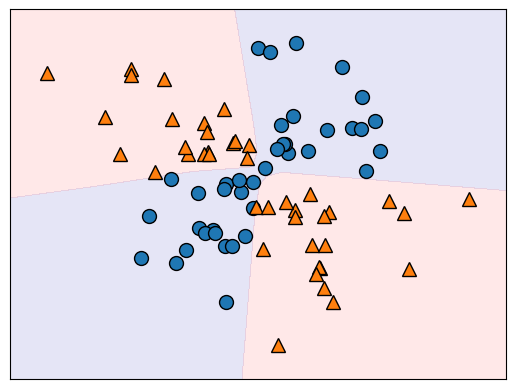

In [28]:
result_visualization(model_pctr, X_train, y_train)

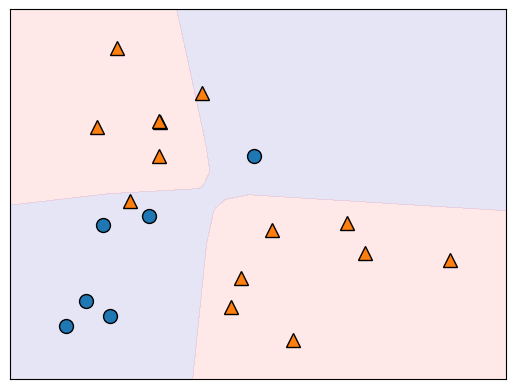

In [29]:
result_visualization(model_pctr, X_test, y_test)

사람 얼굴 인식 문제

In [30]:
from sklearn.datasets import fetch_olivetti_faces

In [31]:
face_data = fetch_olivetti_faces()
print(face_data.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some sid

In [32]:
face_data.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [33]:
face_data.data.shape

(400, 4096)

In [36]:
face_data.data[0]

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

In [37]:
face_data.images[0]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

In [34]:
face_data.images.shape

(400, 64, 64)

In [38]:
face_data.images

array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17355372],
        [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
         0.16115703, 0.16528925],
        [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
         0.16115703, 0.1570248 ]],

       [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
         0.18595041, 0.18595041],
        [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
         0.2107438 , 0.2107438 ],
        [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
         0.20661157, 0.20661157],
        ...,
        [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
         0.1446281 , 0.1446281 ],
        [0.7

In [40]:
face_data.target.shape

(400,)

1) 데이터의 총 개수는?  
400개  
2) 하나의 데이터가 갖고 있는 X_feature의 개수는?  
4096개  
3) 다중 클래스 문제인가?  
네  
4) 클래스의 개수는?  
40개

1) 적정한 층 수는?  
2) 각 층의 노드는 몇 개가 적당한가?  
3) 총 가중치의 개수는? (coef + weight)  

In [41]:
from sklearn.neural_network import MLPClassifier

In [57]:
# 모델 선택
model = MLPClassifier(hidden_layer_sizes=([60, 50, 40]))    # layer가 deep할수록 accuracy 증가

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(face_data.data, face_data.target)

In [60]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[60, 50, 40])

In [61]:
model.score(X_train, y_train)

0.97

In [62]:
model.score(X_test, y_test)

0.8